# 0. Load the Dataset from CSV Files

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline  
plt.style.use('ggplot')

In [0]:
# Load processed training and test data
!ls -al
!mkdir prognostic

from google.colab import drive
drive.mount('/content/drive')

! cp /content/drive/My\ Drive/MLProjects/Prognostic/data/*.csv /content/prognostic
! ls -al /content/prognostic

total 16
drwxr-xr-x 1 root root 4096 Aug 27 16:17 .
drwxr-xr-x 1 root root 4096 Sep  3 04:02 ..
drwxr-xr-x 1 root root 4096 Aug 28 16:06 .config
drwxr-xr-x 1 root root 4096 Aug 27 16:17 sample_data
Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive
total 21116
drwxr-xr-x 2 root root     4096 Sep  3 04:09 .
drwxr-xr-x 1 root root     4096 Sep  3 04:09 ..
-rw------- 1 root root  2153095 Sep  3 04:09 test.csv
-rw------- 1 root root    78607 Sep  3 04:09 test_processed.csv
-rw------- 1 root root  3395968 Sep  3 04

In [0]:
df_train=pd.read_csv('prognostic/train_processed.csv')
df_test=pd.read_csv('prognostic/test_processed.csv')
df_test_original = pd.read_csv('prognostic/test.csv')

display(df_train.head(3), df_test.head(3), df_test_original.head(3))

,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,s11,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21,s1_av,s2_av,s3_av,s4_av,s5_av,s6_av,s7_av,s8_av,s9_av,s10_av,s11_av,s12_av,s13_av,s14_av,s15_av,s16_av,s17_av,s18_av,s19_av,s20_av,s21_av,s1_std,s2_std,s3_std,s4_std,s5_std,s6_std,s7_std,s8_std,s9_std,s10_std,s11_std,s12_std,s13_std,s14_std,s15_std,s16_std,s17_std,s18_std,s19_std,s20_std,s21_std,rul,label_bnc,label_mcc
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,21.61,554.36,2388.06,9046.19,1.3,47.47,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,518.67,641.820000,1589.700000,1400.600000,14.62,21.61,554.360000,2388.06,9046.190000,1.3,47.47,521.66,2388.020,8138.620000,8.419500,0.03,392.000000,2388.0,100.0,39.060000,23.4190,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,191,0,0
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,21.61,553.75,2388.04,9044.07,1.3,47.49,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,518.67,641.985000,1590.760000,1401.870000,14.62,21.61,554.055000,2388.05,9045.130000,1.3,47.48,521.97,2388.045,8135.055000,8.425650,0.03,392.000000,2388.0,100.0,39.030000,23.4213,0.0,0.233345,1.499066,1.796051,0.0,0.0,0.431335,0.014142,1.499066,0.0,0.014142,0.438406,0.035355,5.041671,0.008697,0.0,0.000000,0.0,0.0,0.042426,0.003253,190,0,0
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,21.61,554.26,2388.08,9052.94,1.3,47.27,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,518.67,642.106667,1589.836667,1402.646667,14.62,21.61,554.123333,2388.06,9047.733333,1.3,47.41,522.12,2388.040,8134.446667,8.423033,0.03,391.333333,2388.0,100.0,39.003333,23.3956,0.0,0.267644,1.918654,1.850009,0.0,0.0,0.327159,0.020000,4.632023,0.0,0.121655,0.404475,0.026458,3.717450,0.007640,0.0,1.154701,0.0,0.0,0.055076,0.044573,189,0,0


,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,s11,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21,s1_av,s2_av,s3_av,s4_av,s5_av,s6_av,s7_av,s8_av,s9_av,s10_av,s11_av,s12_av,s13_av,s14_av,s15_av,s16_av,s17_av,s18_av,s19_av,s20_av,s21_av,s1_std,s2_std,s3_std,s4_std,s5_std,s6_std,s7_std,s8_std,s9_std,s10_std,s11_std,s12_std,s13_std,s14_std,s15_std,s16_std,s17_std,s18_std,s19_std,s20_std,s21_std,rul,label_bnc,label_mcc
0,1,31,-0.0006,0.0004,100.0,518.67,642.58,1581.22,1398.91,14.62,21.61,554.42,2388.08,9056.40,1.3,47.23,521.79,2388.06,8130.11,8.4024,0.03,393,2388,100.0,38.81,23.3552,518.67,642.44,1584.696667,1399.330000,14.62,21.61,554.223333,2388.083333,9049.986667,1.3,47.350000,521.986667,2388.076667,8132.676667,8.411533,0.03,392.000000,2388.0,100.0,38.973333,23.374733,0.0,0.437150,3.094614,1.475534,0.0,0.0,0.172143,0.005774,5.594375,0.0,0.104403,0.349333,0.020817,2.372706,0.009411,0.0,1.00000,0.0,0.0,0.145717,0.028070,112,0,0
1,2,49,0.0018,-0.0001,100.0,518.67,642.55,1586.59,1410.83,14.62,21.61,553.52,2388.10,9044.77,1.3,47.67,521.74,2388.09,8126.90,8.4505,0.03,391,2388,100.0,38.81,23.2618,518.67,642.68,1587.293333,1408.673333,14.62,21.61,553.686667,2388.113333,9047.940000,1.3,47.536667,521.763333,2388.103333,8127.106667,8.439700,0.03,391.666667,2388.0,100.0,38.893333,23.283367,0.0,0.153948,0.612563,4.747803,0.0,0.0,0.491664,0.061101,3.917742,0.0,0.119304,0.455448,0.011547,1.570234,0.015373,0.0,0.57735,0.0,0.0,0.090738,0.018825,98,0,0
2,3,126,-0.0016,0.0004,100.0,518.67,642.88,1589.75,1418.89,14.62,21.61,552.59,2388.16,9049.26,1.3,47.88,520.83,2388.14,8131.46,8.4119,0.03,395,2388,100.0,38.93,23.2740,518.67,643.06,1589.626667,1414.756667,14.62,21.61,552.663333,2388.160000,9048.406667,1.3,47.703333,520.610000,2388.170000,8131.030000,8.442600,0.03,394.666667,2388.0,100.0,38.723333,23.245433,0.0,0.180000,0.931146,3.580703,0.0,0.0,0.405010,0.030000,0.752152,0.0,0.153080,0.416173,0.036056,2.819699,0.026739,0.0,0.57735,0.0,0.0,0.188768,0.025085,69,0,0


,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,s11,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,21.61,553.90,2388.04,9050.17,1.3,47.2,521.72,2388.03,8125.55,8.4052,0.03,392,2388,100.0,38.86,23.3735
1,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,21.61,554.85,2388.01,9054.42,1.3,47.5,522.16,2388.06,8139.62,8.3803,0.03,393,2388,100.0,39.02,23.3916
2,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,21.61,554.11,2388.05,9056.96,1.3,47.5,521.97,2388.03,8130.10,8.4441,0.03,393,2388,100.0,39.08,23.4166


In [0]:
original_features = ['setting1', 'setting2', 'setting3', 's1','s2','s3','s4','s5','s6','s7','s8','s9','s10','s11','s12','s13','s14','s15','s16','s17','s18','s19','s20', 's21']
sensor_features = ['s1','s2','s3','s4','s5','s6','s7','s8','s9','s10','s11','s12','s13','s14','s15','s16','s17','s18','s19','s20', 's21']
constant_features = ['setting3','s1', 's5' , 's6', 's10', 's16', 's18', 's19']
variable_features = ['setting1', 'setting2', 's2','s3','s4','s7','s8','s9','s11','s12','s13','s14','s15','s17','s20', 's21']
constant_sensor_features = ['s1', 's5' , 's6', 's10', 's16', 's18', 's19']
variable_sensor_features = ['s2','s3','s4','s7','s8','s9','s11','s12','s13','s14','s15','s17','s20', 's21']

# 1. Principal Component Analysis

Extending the Exploratory Data Analysis which was performed in the previous notebook and preparing the dataset for principal component analysis

In the previous notebook we observed that
* All the sensor data (features) have normal distribution.
* Some of the sensor data are almost constant (and we will ignore them in our analysis)
* There are lot of outliers in the feature data (data beyond the IQR range)

Let's now look if we need to perform the scaling of the data for the purposes of Principal Component Analysis. This is usually required if the range of values and the minimum and maximum of the features varies a lot. In that case we applied the standard scaling to dataset

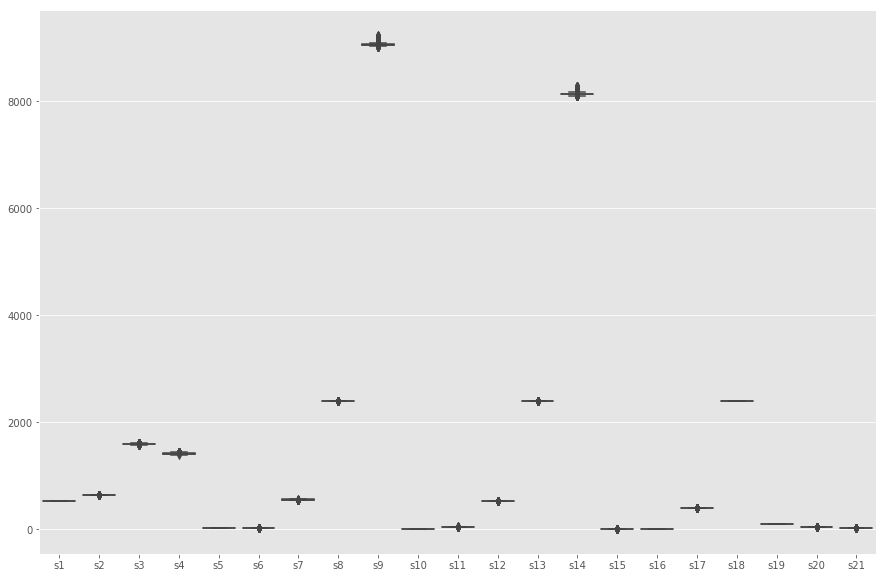

In [0]:
fig, ax = plt.subplots(figsize=(15,10))
feature_data = df_train[sensor_features]
sns.boxplot(data=feature_data)
plt.show()

We can see that the range of the values (min and max) of the individual features and possible the variations that each feature exhibit are quite different. Given these are sensor readings and based on the understanding of the data the sensors are measuring different attributes with different unit of measurements

So for PCA purposes we will have to perform the feature scaling. Lets see if most of the features are normally distributed or not and we may choose to do the "Standardization" scaling to the features before applying the PCA i.e. set mean as 0 and standard deviation as 1

In [0]:
from sklearn import preprocessing
from sklearn.decomposition import PCA

#scaling the features data
df_train_sclftr = pd.DataFrame(preprocessing.scale(df_train[variable_sensor_features]), columns=variable_sensor_features)

display(df_train_sclftr.describe().T)

,count,mean,std,min,25%,50%,75%,max
s2,20631.0,6.258537e-14,1.000024,-2.941625,-0.711809,-0.081860,0.638080,3.697829
s3,20631.0,-4.962530e-14,1.000024,-3.177804,-0.695338,-0.069013,0.629079,4.303846
s4,20631.0,8.308134e-16,1.000024,-2.964737,-0.730389,-0.099305,0.624553,3.617202
s7,20631.0,-3.149990e-14,1.000024,-3.974497,-0.630132,0.081676,0.725692,3.041891
s8,20631.0,1.008424e-12,1.000024,-2.770375,-0.657216,-0.093707,0.610680,6.527526
s9,20631.0,-4.172343e-14,1.000024,-1.970486,-0.549894,-0.207539,0.189158,8.121740
s11,20631.0,-2.547136e-15,1.000024,-2.587860,-0.715769,-0.116699,0.594696,3.702368
s12,20631.0,-1.199984e-13,1.000024,-3.692663,-0.614845,0.090206,0.727463,2.666353
s13,20631.0,3.503748e-13,1.000024,-3.005574,-0.780793,-0.085548,0.609696,6.449748
s14,20631.0,2.704422e-15,1.000024,-2.296780,-0.550843,-0.168419,0.238905,7.861686


In [0]:
from sklearn.decomposition import PCA

def pca_results(good_data, pca, size):
  """
  Create a DataFrame of the PCA results.
  Includes Dimension Feature Weigts and explained variances and explained variance ratios
  Visualize the PCA results
  """
  
  #Label the dimensions of the PCA as Dimension 1, Dimension 2 and so on
  dimensions = ['Dimension {}'.format(i) for i in range(1, len(pca.components_)+1)]
  
  #Create the dataframe of the PCA Components
  components = pd.DataFrame(np.round(pca.components_, 4), columns = list(good_data.keys()))
  components.index = dimensions
  
  #PCA explained variance
  ratios = pca.explained_variance_ratio_.reshape(len(pca.components_), 1)
  variance_ratios = pd.DataFrame(np.round(ratios,4), columns=['Explained Variance'])
  variance_ratios.index=dimensions
  
  #Create a bar plot visualization
  fig, ax = plt.subplots(figsize=size)
  
  #Plot the Feature Weights as the function of the components
  components.plot(ax=ax, kind='bar')
  ax.legend()
  ax.set_ylabel("Feature Weights")
  ax.set_xticklabels(dimensions, rotation=0)
  
  #Display the explained variance ratios
  for i, ev in enumerate(pca.explained_variance_ratio_):
    ax.text(i-0.40, ax.get_ylim()[1]+0.05, "Explained Variance\n       %.4f"%(ev))
  

  
  
  #Create the Line Chart for cumulate explained variance an explained variance of individial princinple dimensions
  fig1, ax1 = plt.subplots(figsize=size)
  ax1.plot(np.cumsum(variance_ratios), label="Cumulative Explained Variance", marker=".")
  ax1.plot(variance_ratios, label="Explained Variance per PCA Dimension")
  ax1.set_xlabel("Princinpal Components / PCA Dimesions")
  ax1.set_ylabel("Explained Variance (Cumulative and Individual)")
  ax1.legend()
  
 
  plt.show()
  return(pd.concat([variance_ratios, components], axis=1))

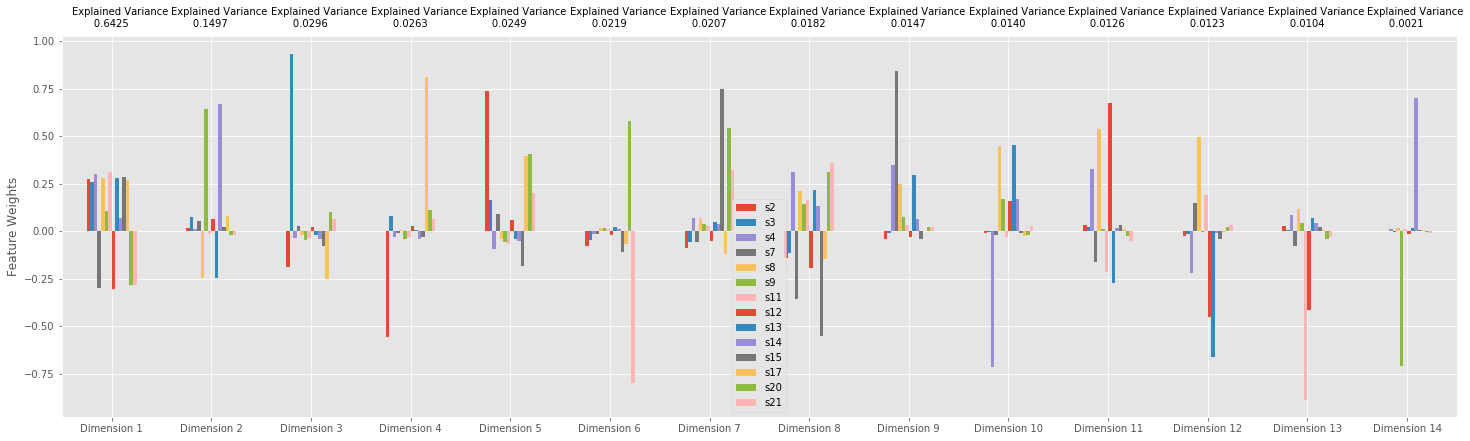

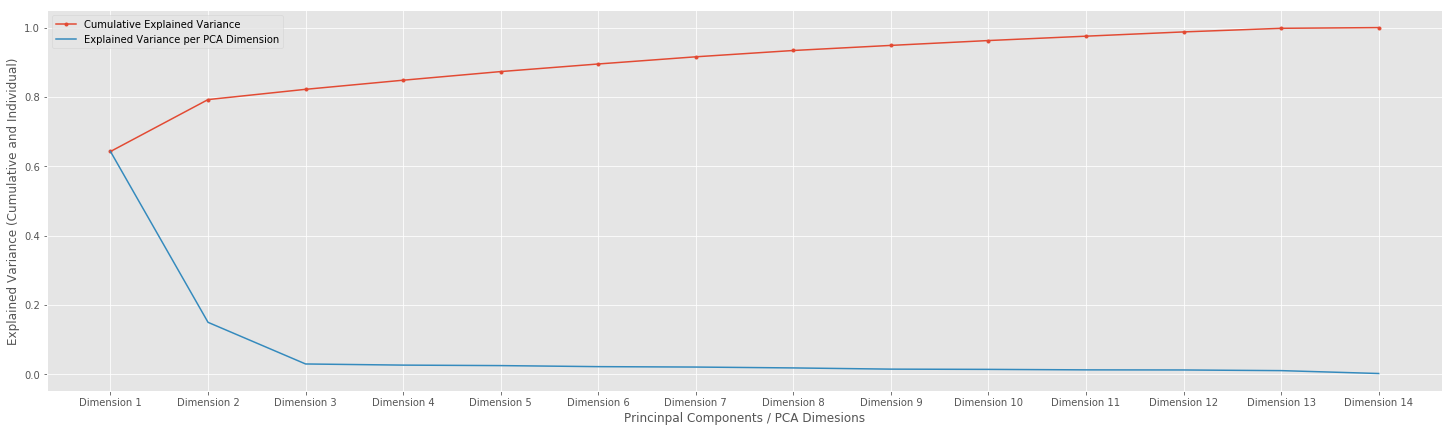

In [0]:
# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
pca = PCA(random_state=2).fit(df_train_sclftr)
pca_results = pca_results(df_train_sclftr, pca, (25,7))

In [0]:
def plot_PCA_2D(good_data, reduced_data, pca, size):
  """
  Produce a 2D Scatter plot that show's the reduced dataset for all the observations
  
  Arguments:
  good_data = original data before transformation, in a Pandas Dataframe with Columns Names
  reduced_data = reduced data set, first two dimensions are plotted.
  pca = pca objects that contain component attributes
  
    This procedure is inspired by the script:
    https://github.com/teddyroland/python-biplot

  """
  fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24,8))
  ax[0].scatter(x=reduced_data.loc[:,'Dimension 1'], y=reduced_data.loc[:,'Dimension 2'], facecolor='b', edgecolors='lightblue', s=70, alpha=0.5)
  ax[0].set_xlabel("Dimension 1")
  ax[0].set_ylabel("Dimension 2")
  ax[0].set_title("Scatter Plot of the first two Principal Components / Dimensions")
  
  ax[1].scatter(x=reduced_data.loc[:,'Dimension 1'], y=reduced_data.loc[:,'Dimension 2'], facecolor='b', edgecolors='lightblue', s=70, alpha=0.5)
  ax[1].scatter(x=reduced_data.groupby('id').first()['Dimension 1'], y=reduced_data.groupby('id').first()['Dimension 2'], facecolors='red', edgecolors='red' )
  ax[1].scatter(x=reduced_data.groupby('id').last()['Dimension 1'], y=reduced_data.groupby('id').last()['Dimension 2'], facecolors='yellow', edgecolors='yellow' )
  
  
  return ax
  

In [0]:
identifier_list = ['id', 'cycle', 'setting1', 'setting2', 'setting3' ]
pca = PCA(random_state=2).fit(df_train_sclftr)

#Label the dimensions of the PCA as Dimension 1, Dimension 2 and so on
dimensions = ['Dimension {}'.format(i) for i in range(1, len(pca.components_)+1)]

#Transform the training data features using the fitted PCa
reduced_data_features=pd.DataFrame(pca.transform(df_train_sclftr), columns=dimensions)

#Adding identifier from the original training dataset to the reduced dataframes, and training dataset with selected features 
df_identifier = df_train[identifier_list]

df_train_scaled = pd.concat([df_identifier, df_train_sclftr], axis=1)
df_reduced_data = pd.concat([df_identifier, reduced_data_features], axis=1)

#plot_PCA_2D(df_train_scaled, df_reduced_data, pca, (12,8))

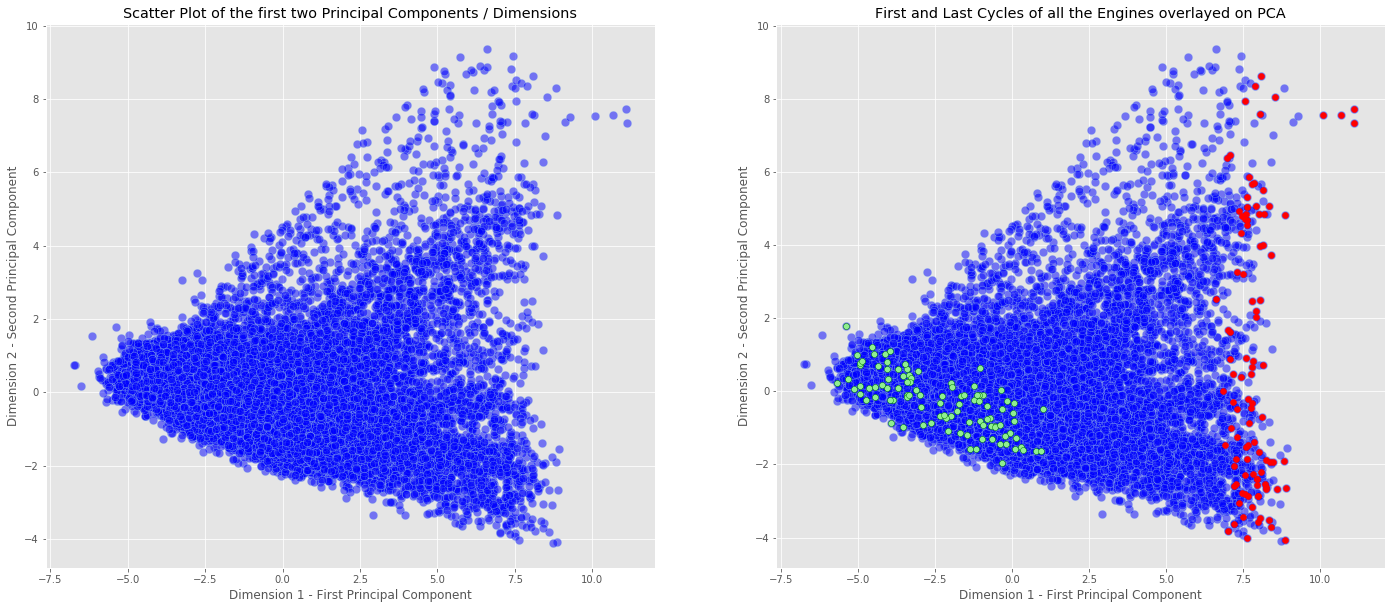

In [0]:
  fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 10))
  ax[0].scatter(x=df_reduced_data.loc[:,'Dimension 1'], y=df_reduced_data.loc[:,'Dimension 2'], facecolor='b', edgecolors='lightblue', s=70, alpha=0.5)
  ax[0].set_xlabel("Dimension 1 - First Principal Component")
  ax[0].set_ylabel("Dimension 2 - Second Principal Component")
  ax[0].set_title("Scatter Plot of the first two Principal Components / Dimensions")
  
  ax[1].set_xlabel("Dimension 1 - First Principal Component")
  ax[1].set_ylabel("Dimension 2 - Second Principal Component")
  ax[1].set_title("First and Last Cycles of all the Engines overlayed on PCA")
  ax[1].scatter(x=df_reduced_data.loc[:,'Dimension 1'], y=df_reduced_data.loc[:,'Dimension 2'], facecolor='b', edgecolors='lightblue', s=70, alpha=0.5)
  ax[1].scatter(x=df_reduced_data.groupby('id').first()['Dimension 1'], y=df_reduced_data.groupby('id').first()['Dimension 2'], facecolors='lightgreen', edgecolors='green' )
  ax[1].scatter(x=df_reduced_data.groupby('id').last()['Dimension 1'], y=df_reduced_data.groupby('id').last()['Dimension 2'], facecolors='red', edgecolors='red' )

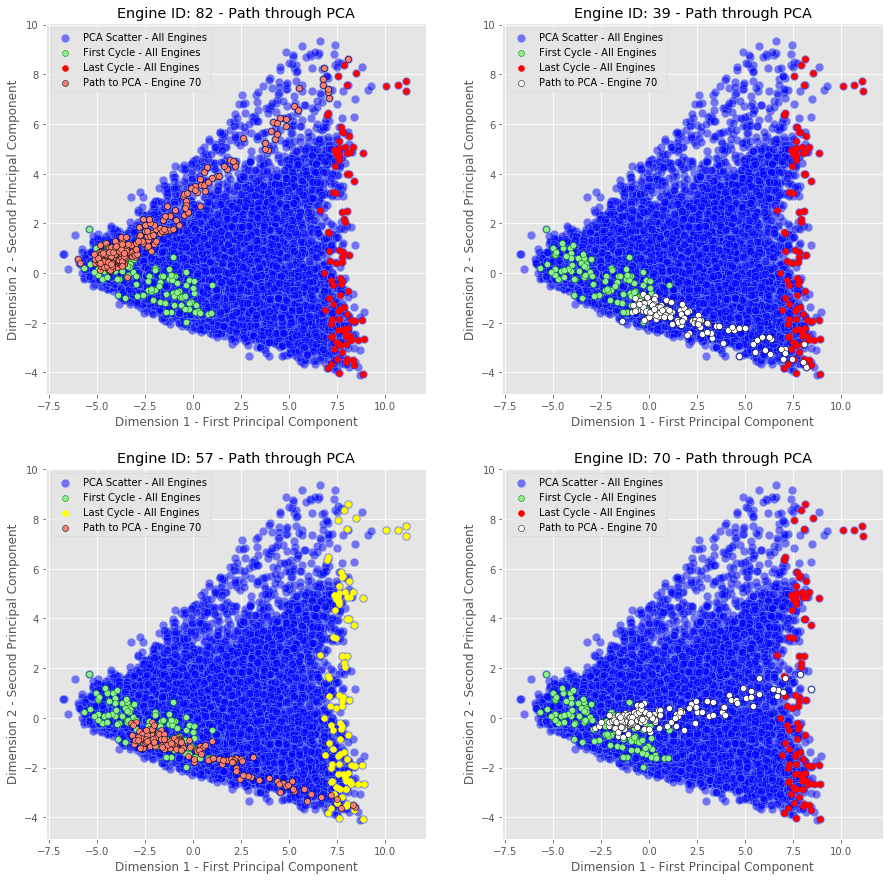

In [0]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15,15))

ax[0,0].scatter(x=df_reduced_data.loc[:,'Dimension 1'], y=df_reduced_data.loc[:,'Dimension 2'], facecolor='b', edgecolors='lightblue', s=70, alpha=0.5, label="PCA Scatter - All Engines")
ax[0,0].scatter(x=df_reduced_data.groupby('id').first()['Dimension 1'], y=df_reduced_data.groupby('id').first()['Dimension 2'], facecolors='lightgreen', edgecolors='green', label="First Cycle - All Engines")
ax[0,0].scatter(x=df_reduced_data.groupby('id').last()['Dimension 1'], y=df_reduced_data.groupby('id').last()['Dimension 2'], facecolors='red', edgecolors='red', label="Last Cycle - All Engines" )
ax[0,0].scatter(x=df_reduced_data[df_reduced_data['id']==82]['Dimension 1'], y=df_reduced_data[df_reduced_data['id']==82]['Dimension 2'], facecolors='salmon', edgecolor='black', label='Path to PCA - Engine 70')
ax[0,0].set_xlabel("Dimension 1 - First Principal Component")
ax[0,0].set_ylabel("Dimension 2 - Second Principal Component")
ax[0,0].set_title("Engine ID: 82 - Path through PCA")
ax[0,0].legend()

ax[0,1].scatter(x=df_reduced_data.loc[:,'Dimension 1'], y=df_reduced_data.loc[:,'Dimension 2'], facecolor='b', edgecolors='lightblue', s=70, alpha=0.5, label="PCA Scatter - All Engines")
ax[0,1].scatter(x=df_reduced_data.groupby('id').first()['Dimension 1'], y=df_reduced_data.groupby('id').first()['Dimension 2'], facecolors='lightgreen', edgecolors='green', label="First Cycle - All Engines")
ax[0,1].scatter(x=df_reduced_data.groupby('id').last()['Dimension 1'], y=df_reduced_data.groupby('id').last()['Dimension 2'], facecolors='red', edgecolors='red', label="Last Cycle - All Engines" )
ax[0,1].scatter(x=df_reduced_data[df_reduced_data['id']==39]['Dimension 1'], y=df_reduced_data[df_reduced_data['id']==39]['Dimension 2'], facecolors='white', edgecolor='black', label='Path to PCA - Engine 70')
ax[0,1].set_xlabel("Dimension 1 - First Principal Component")
ax[0,1].set_ylabel("Dimension 2 - Second Principal Component")
ax[0,1].set_title("Engine ID: 39 - Path through PCA")
ax[0,1].legend()

ax[1,0].scatter(x=df_reduced_data.loc[:,'Dimension 1'], y=df_reduced_data.loc[:,'Dimension 2'], facecolor='b', edgecolors='lightblue', s=70, alpha=0.5, label="PCA Scatter - All Engines")
ax[1,0].scatter(x=df_reduced_data.groupby('id').first()['Dimension 1'], y=df_reduced_data.groupby('id').first()['Dimension 2'], facecolors='lightgreen', edgecolors='green', label="First Cycle - All Engines")
ax[1,0].scatter(x=df_reduced_data.groupby('id').last()['Dimension 1'], y=df_reduced_data.groupby('id').last()['Dimension 2'], facecolors='yellow', edgecolors='yellow', label="Last Cycle - All Engines" )
ax[1,0].scatter(x=df_reduced_data[df_reduced_data['id']==57]['Dimension 1'], y=df_reduced_data[df_reduced_data['id']==57]['Dimension 2'], facecolors='salmon', edgecolor='black', label='Path to PCA - Engine 70')
ax[1,0].set_xlabel("Dimension 1 - First Principal Component")
ax[1,0].set_ylabel("Dimension 2 - Second Principal Component")
ax[1,0].set_title("Engine ID: 57 - Path through PCA")
ax[1,0].legend()

ax[1,1].scatter(x=df_reduced_data.loc[:,'Dimension 1'], y=df_reduced_data.loc[:,'Dimension 2'], facecolor='b', edgecolors='lightblue', s=70, alpha=0.5, label="PCA Scatter - All Engines")
ax[1,1].scatter(x=df_reduced_data.groupby('id').first()['Dimension 1'], y=df_reduced_data.groupby('id').first()['Dimension 2'], facecolors='lightgreen', edgecolors='green', label="First Cycle - All Engines")
ax[1,1].scatter(x=df_reduced_data.groupby('id').last()['Dimension 1'], y=df_reduced_data.groupby('id').last()['Dimension 2'], facecolors='red', edgecolors='red', label="Last Cycle - All Engines" )
ax[1,1].scatter(x=df_reduced_data[df_reduced_data['id']==70]['Dimension 1'], y=df_reduced_data[df_reduced_data['id']==70]['Dimension 2'], facecolors='white', edgecolor='black', label='Path to PCA - Engine 70')
ax[1,1].set_xlabel("Dimension 1 - First Principal Component")
ax[1,1].set_ylabel("Dimension 2 - Second Principal Component")
ax[1,1].set_title("Engine ID: 70 - Path through PCA")
ax[1,1].legend()



As we can see from the path to PCA plots: 
-	starting position of the cycles (i.e., the normal operation range) is clustered around the bottom left of the scatter plot.
-	the end of the cycle (i.e. the critical operation range) is towards the edges of the scatter plot) 
-	we can assume a pseudo cluster in the center of the plot for our purposes, and classify that as warning operation range)


**How to plan Predictive Maintenance using this information?**

We can use this information to gradually (and conservatively delay the planned scheduled maintenance) and continuously observe the operational ranges of the engines. 

For e.g., the original dataset also reveals that scheduled maintenance was performed after 150 cycles so if we overlay the above three clusters and start to gradually shift the planned maintenance say by +10 cycles and observing the individual engines as they shift from warning to critical state (threshold to be defined during operations) and update our clusters. 

As we iterate through process, we will have 
-	sufficient fault patterns captured in the data  
-	revised and optimized operational ranges and threshold for normal, warning and critical operations
-	as well as some run-to-failure events captured

With these data points captured we can move on the next stage of planning predictive maintenance where supervised machine learning approached can be applied to the telemetry data with run-to-failure events and optimized bands of operational ranges.
